In [1]:
using SparseArrays
using Arpack
using LinearAlgebra
using Plots

In [2]:
function get_unique_row_index(column_index, i, N)
    reference_bits =(2^(N-1) + 2^(N-2)) >> (i-1)
    return column_index ⊻ reference_bits
end

get_unique_row_index (generic function with 1 method)

In [3]:
function create_sparse_TFIM(N, J, h)
    I = Int[]
    C = Int[]
    V = Float64[]
    for column_index in 0:(2^N) - 1
        temp = 0
        for i in 0:N-1
            temp += h * (-1)^(column_index >> i)
        end
        # diagonal term
        push!(I, column_index + 1)
        push!(C, column_index + 1)
        push!(V, temp)
        # off diagonal terms
        for i in 1:N-1
            row_index = get_unique_row_index(column_index, i, N)
            push!(I, row_index + 1)
            push!(C, column_index + 1)
            push!(V, -J)
        end
    end
    return I, C, V
end

create_sparse_TFIM (generic function with 1 method)

In [4]:
h_range = range(0, 2, 1000)
l_list = [8, 10, 12]

3-element Vector{Int64}:
  8
 10
 12

In [5]:
gs_eigenvals = Array{Float64}(undef, length(l_list), 1000)
for i in 1:length(l_list)
    L = l_list[i]
    for j in 1:length(h_range)
        h = h_range[j]
        I, C, V = create_sparse_TFIM(L, 1, h)
        H = sparse(I, C, V)
        vals, vecs = eigs(H, nev=1, which=:SR)
        gs_eigenvals[i, j] = vals[1]
    end
end

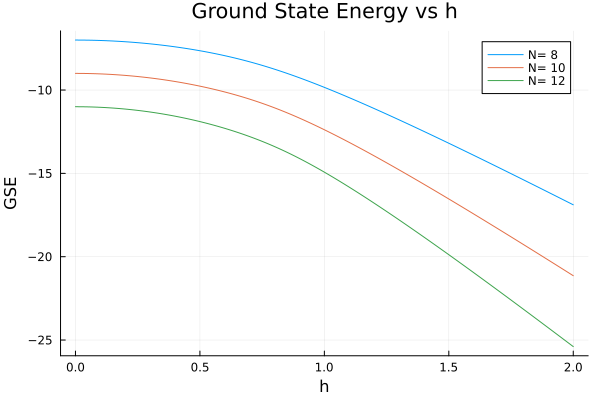

In [6]:
P = plot()
plot!(P, title = "Ground State Energy vs h", xlabel = "h", ylabel = "GSE")
for i in 1:length(l_list)
    plot!(P, h_range, gs_eigenvals[i, :], label = "N= " * string(l_list[i]))
end
display(P)